In [30]:
#Importe
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Datenset laden
food_df = pd.read_csv("food.csv")

food_df

,Unnamed: 0,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [31]:
#Weglassen der Ländernamen für Skalierung und PCA
X = food_df.drop(columns=["Unnamed: 0"])

#Z-Transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
1,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
2,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
3,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
4,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


In [36]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#PCA Dataframe
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["Country"] = food_df["Unnamed: 0"]


pca_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Country
0,3.557238,-1.664102,-1.797551,0.234394,0.023733,-1.055592,-0.481470,-0.777255,-0.105382,Albania
1,-1.452006,-1.062702,1.365390,0.171564,-0.952695,0.222932,-0.184890,0.256178,-0.221930,Austria
2,-1.655480,0.162784,0.221000,0.531464,0.770661,-0.295781,-0.199630,0.207504,-0.033855,Belgium
3,3.198708,-1.327895,0.154409,0.218606,-0.494741,-0.709921,0.474367,0.824911,-0.306046,Bulgaria
4,-0.378104,-0.615096,1.220603,-0.473550,0.262120,-0.840063,0.321443,-0.012552,-0.152530,Czechoslovakia
5,-2.414042,0.291332,-0.767776,-0.987288,-0.767949,-0.173842,-0.230472,0.633827,0.490183,Denmark
6,-1.451538,0.459586,1.329399,-1.159386,0.431664,-0.661681,-0.566223,0.166542,-0.265261,E Germany
7,-1.596104,-0.608293,-2.091770,-1.444493,0.037970,0.851402,0.741206,-0.230576,-0.135834,Finland
8,-1.518666,0.801560,0.001921,1.997822,0.255623,-0.917485,0.965992,0.022678,0.554817,France
9,2.285884,1.021701,-0.900803,1.831320,-0.413328,1.168077,-0.150430,0.312137,0.395965,Greece


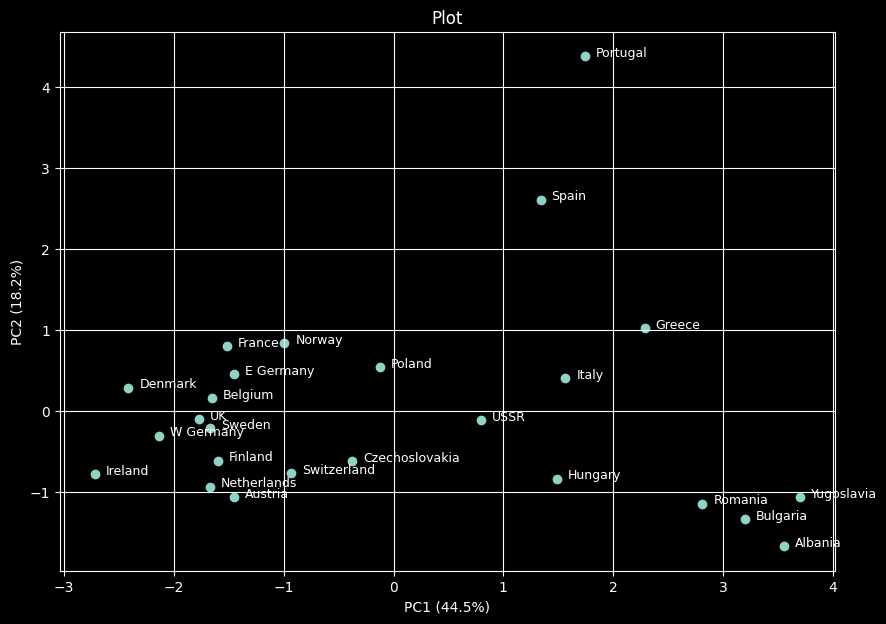

In [33]:
#Plot Generierung

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

#Ländernamen
for i, country in enumerate(food_df["Unnamed: 0"]):
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1], country, fontsize=9)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title("Plot")
plt.grid(True)
plt.show()
